# 2.	CARGA DE DATOS

In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas_datareader as pdr

In [4]:
import yfinance as yf

# Set the ticker symbol
ticker_symbol = 'AAPL'

# Request the data from Yahoo Finance
df = yf.download(ticker_symbol)
#df.index = pd.to_datetime(df.index)
#df = df.asfreq('B')

# Print the data info
print(df.info())

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10997 entries, 1980-12-12 to 2024-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10997 non-null  float64
 1   High       10997 non-null  float64
 2   Low        10997 non-null  float64
 3   Close      10997 non-null  float64
 4   Adj Close  10997 non-null  float64
 5   Volume     10997 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 601.4 KB
None


In [5]:
df.rename({'Open':'precio_apertura', 'High':'precio_max', 'Low': 'precio_min',
           'Close': 'precio_cierre', 'Adj Close':'precio_ajustado_cierre', 'Volume': 'Volumen'}, axis=1, inplace=True)

In [6]:
df

,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volumen
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...
2024-07-23,224.369995,226.940002,222.679993,225.009995,225.009995,39960300
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200


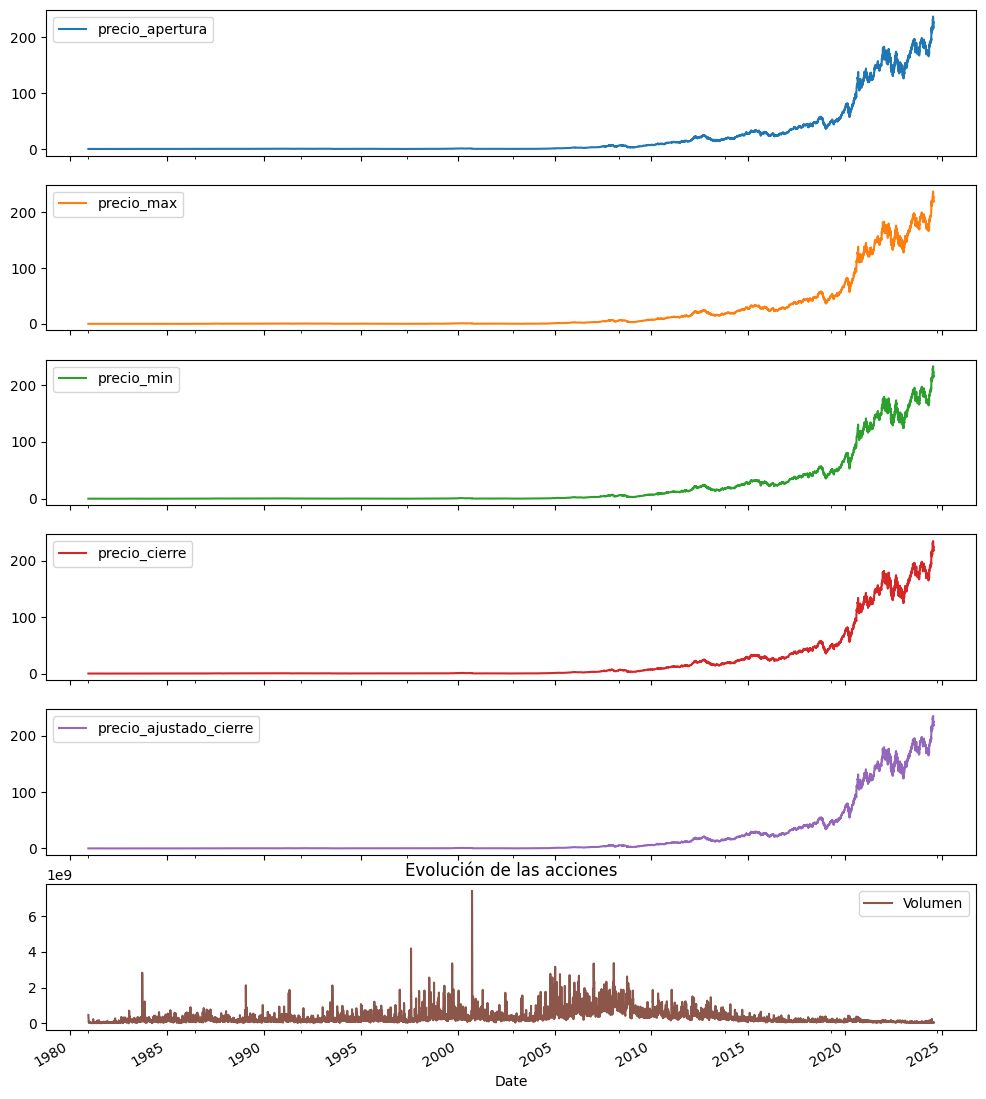

In [7]:
df.plot(subplots=True, figsize=(12,15))
plt.title('Evolución de las acciones')

plt.show()

# 3.	DESCOMPOSICIÓN DE LA SERIE

Los cuatro componentes de una serie de tiempo

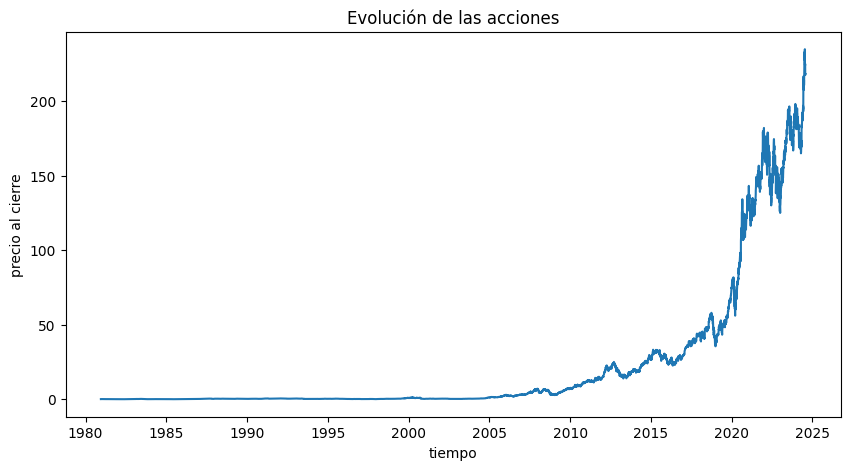

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df.precio_cierre)
plt.title("Evolución de las acciones")
plt.xlabel("tiempo")
plt.ylabel("precio al cierre")
plt.show()

In [9]:
df['fecha'] = pd.to_datetime(df.index)

In [10]:
df.fecha[0]

Timestamp('1980-12-12 00:00:00')

In [11]:
df.describe()

,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volumen,fecha
count,10997.000000,10997.000000,10997.000000,10997.000000,10997.000000,1.099700e+04,10997
mean,22.281256,22.521069,22.050721,22.294887,21.501436,3.181058e+08,2002-09-25 20:49:52.088751488
min,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00,1980-12-12 00:00:00
25%,0.299107,0.303571,0.290179,0.298549,0.242046,1.132548e+08,1991-10-28 00:00:00
50%,0.531250,0.537946,0.522321,0.531250,0.432579,2.057664e+08,2002-09-23 00:00:00
75%,20.196428,20.382856,19.988930,20.190001,17.272299,3.985408e+08,2013-08-23 00:00:00
max,236.479996,237.229996,233.089996,234.820007,234.820007,7.421641e+09,2024-07-29 00:00:00
std,45.967442,46.459868,45.505384,46.001604,45.577912,3.354572e+08,NaN


In [12]:
df.isna().sum()

precio_apertura           0
precio_max                0
precio_min                0
precio_cierre             0
precio_ajustado_cierre    0
Volumen                   0
fecha                     0
dtype: int64

Varios artículos sugieren que cuando se tiene datos diarios como en nuestro caso se pruebe con 3 opciones:

5 : porque ese es el número de días que la bolsa se encuentra abierta por semana,
20 : porque es el número de días que la bolsa se encuentra abierta por mes, y
253: porque es el número de días que la bolsa se encuentra abierta por año aproximadamente

period=253 indicaría que estás buscando patrones estacionales anuales en los datos.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

In [14]:
c = df[df['fecha'].dt.year >= 2021]

In [15]:
c

,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volumen,fecha
Date,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,126.830063,143301900,2021-01-04
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.398163,97664900,2021-01-05
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.076088,155088000,2021-01-06
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.309967,109578200,2021-01-07
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.417450,105158200,2021-01-08
...,...,...,...,...,...,...,...
2024-07-23,224.369995,226.940002,222.679993,225.009995,225.009995,39960300,2024-07-23
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600,2024-07-24
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200,2024-07-25


**PERIODICIDAD 5**

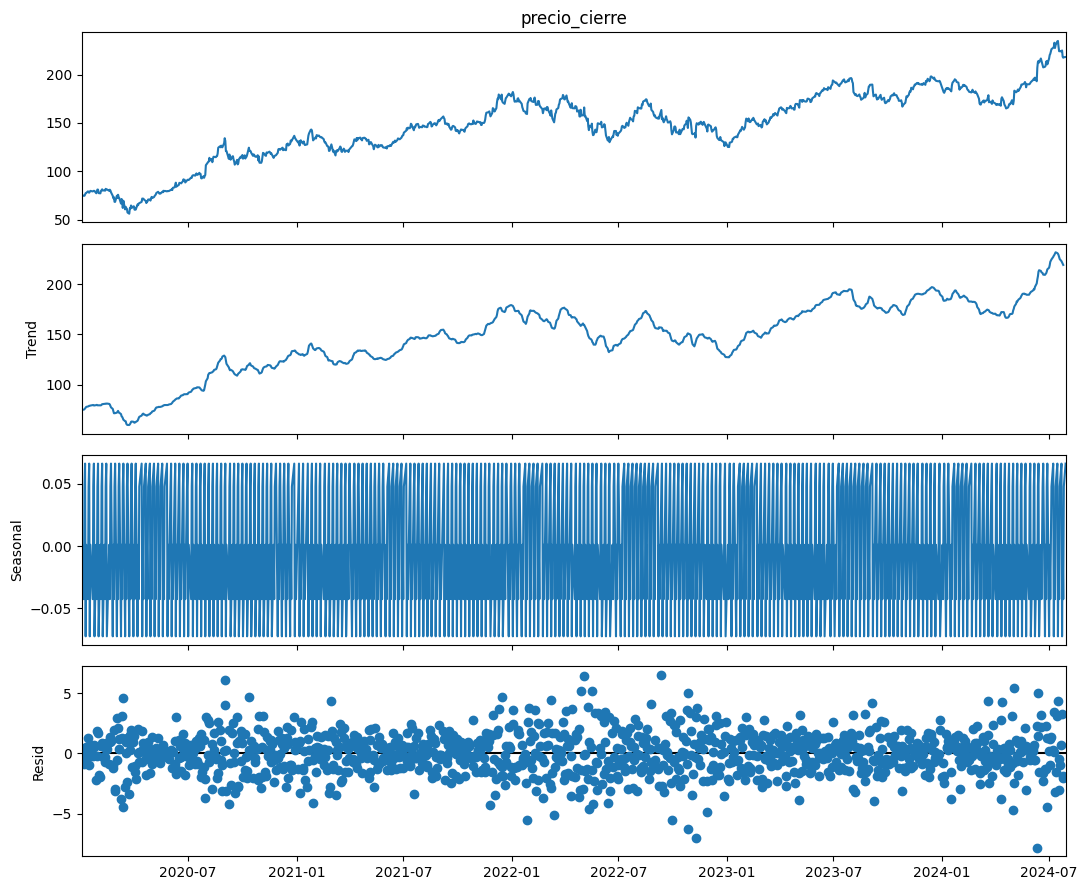

In [16]:
result1 = seasonal_decompose(df.precio_cierre[df.index>"2020"], model='additive', period=5)

result1.plot()
plt.show()
#La frecuencia es semanal

In [17]:
tendencia1 = result1.trend
estacional1 = result1.seasonal
residuo1 = result1.resid

In [18]:
tendencia1.isnull().sum()

4

In [19]:
!pip install statsmodels
import pandas as pd
from statsmodels.tsa.stattools import adfuller
X1 = residuo1.dropna()
result_DF = adfuller(X1)
print('ADF Statistic: %f' % result_DF[0])
print('p-value: %f' % result_DF[1])
print('Critical Values:')
for key, value in result_DF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.825342
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


-El estadístico ADF de -13.668325 es mucho más negativo que todos los valores críticos (-3.435, -2.863, y -2.568). Esto indica que podemos rechazar la hipótesis nula a niveles de significancia del 1%, 5% y 10%.


**PERIODICIDAD 20**

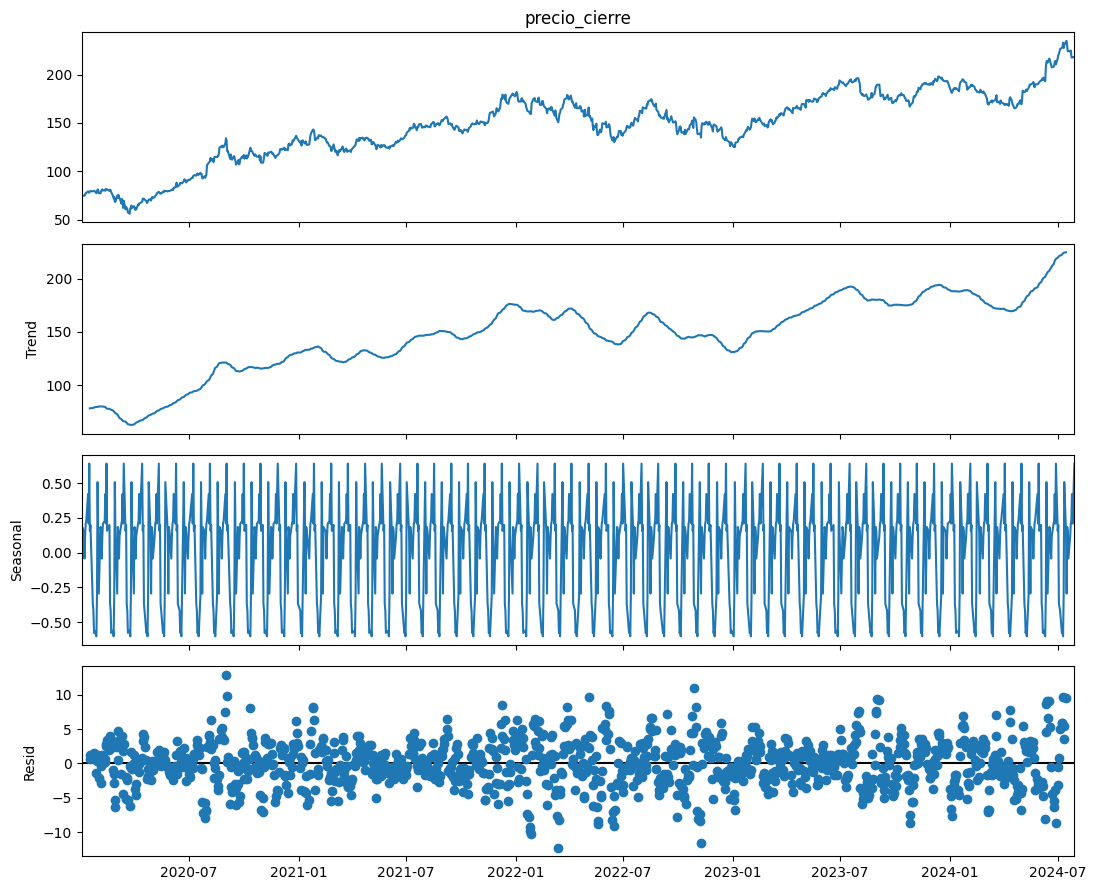

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
result2 = seasonal_decompose(df.precio_cierre[df.index>"2020"], model='additive', period=20)

result2.plot()
plt.show()
#La frecuencia es mensual

In [21]:
tendencia2 = result2.trend
estacional2 = result2.seasonal
residuo2 = result2.resid

In [22]:
tendencia2.isnull().sum()

20

In [23]:
X2 = residuo2.dropna()
result_DF2 = adfuller(X2)
print('ADF Statistic: %f' % result_DF2[0])
print('p-value: %f' % result_DF2[1])
print('Critical Values:')
for key, value in result_DF2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.463871
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


**PERIODICIDAD 253**

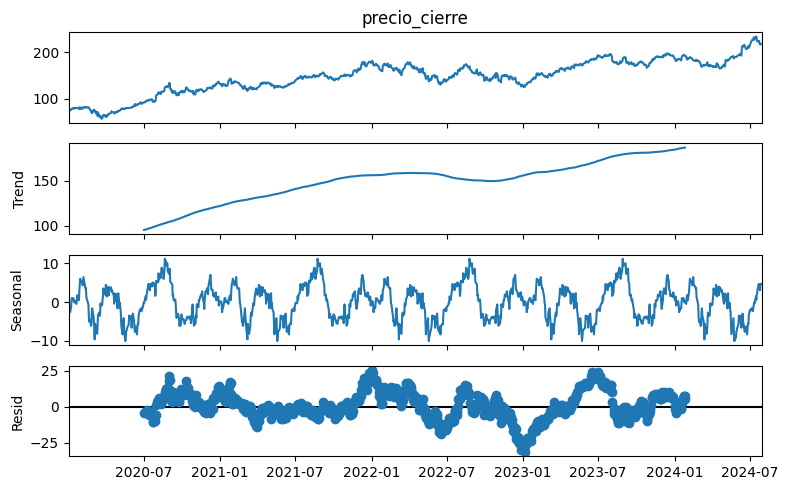

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
result3 = seasonal_decompose(df.precio_cierre[df.index>"2020"], model='aditive', period=253)

result3.plot()
plt.show()
#La frecuencia es diaria

In [56]:
tendencia3 = result3.trend
estacional3 = result3.seasonal
residuo3 = result3.resid

In [57]:
tendencia3.isnull().sum()

252

In [58]:
residuo3

Date
2020-01-02   NaN
2020-01-03   NaN
2020-01-06   NaN
2020-01-07   NaN
2020-01-08   NaN
              ..
2024-07-23   NaN
2024-07-24   NaN
2024-07-25   NaN
2024-07-26   NaN
2024-07-29   NaN
Name: resid, Length: 1150, dtype: float64

In [59]:
X3 = residuo3.dropna()
result_DF3 = adfuller(X3)
print('ADF Statistic: %f' % result_DF3[0])
print('p-value: %f' % result_DF3[1])
print('Critical Values:')
for key, value in result_DF3[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.651043
p-value: 0.004857
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.568


#5.	COMPONENTES DE LA SERIE

In [60]:
precio_cierre_diff = df.precio_cierre[df.index>"2020"].diff(1).dropna()

In [61]:
precio_cierre_diff

Date
2020-01-03   -0.730003
2020-01-06    0.592499
2020-01-07   -0.352493
2020-01-08    1.199997
2020-01-09    1.610001
                ...   
2024-07-23    1.049988
2024-07-24   -6.470001
2024-07-25   -1.049988
2024-07-26    0.470001
2024-07-29    0.279999
Name: precio_cierre, Length: 1149, dtype: float64

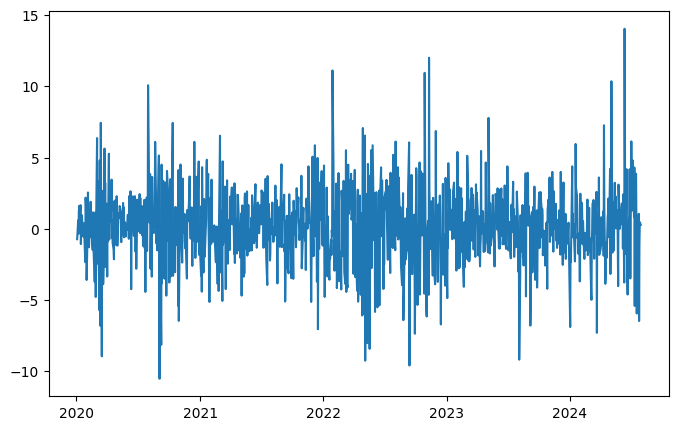

In [62]:
plt.plot(precio_cierre_diff)

In [63]:
from statsmodels.tsa.stattools import adfuller

In [64]:
from statsmodels.tsa.stattools import adfuller

result_DF_diff = adfuller(precio_cierre_diff)
print('ADF Statistic: %f' % result_DF_diff[0])
print('p-value: %f' % result_DF_diff[1])
print('Critical Values:')
for key, value in result_DF_diff[4].items():
    print('\t%s: %.3f' % (key, value)) # Indent this line to include it in the for loop

ADF Statistic: -34.612069
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


**5.1 Graficar el ACF y el PACF**

In [65]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams["figure.figsize"] = (8,5)

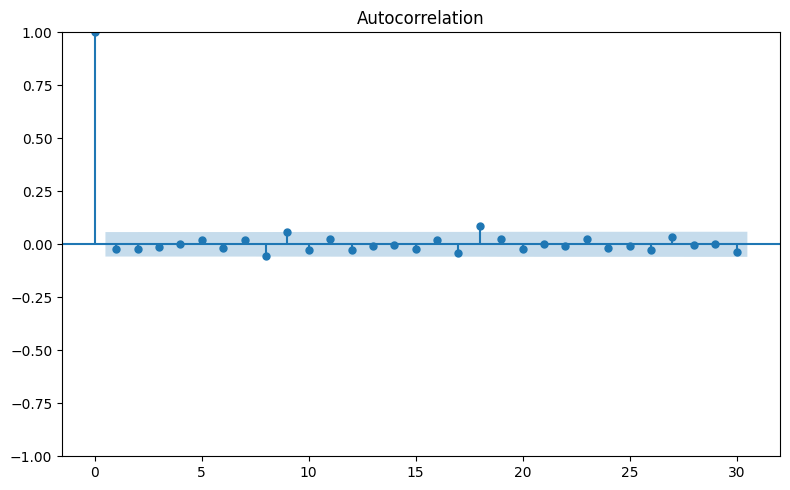

In [66]:
plot_acf(precio_cierre_diff, lags=30);
plt.tight_layout()

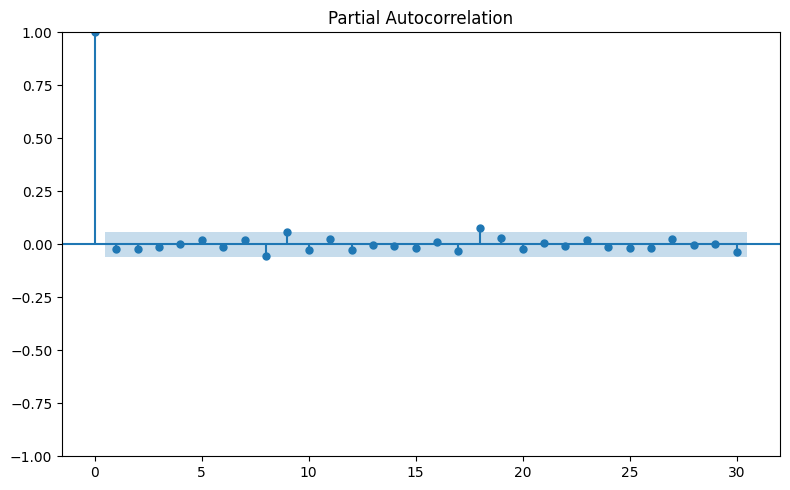

In [67]:
plot_pacf(precio_cierre_diff, lags=30);
plt.tight_layout()

# 6.	EVALUACIÓN DEL MODELO

In [68]:
from statsmodels.tsa.arima.model import ARIMA

In [71]:
#Definimos el orden de los componentes:
p = 8
d = 1
q = 8

In [70]:
modelo1 = ARIMA(df.precio_cierre[df.index>"2020"], order=(p, d, q))
resultado1 = modelo1.fit()
print(resultado1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          precio_cierre   No. Observations:                 1150
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2766.795
Date:                Tue, 30 Jul 2024   AIC                           5539.591
Time:                        03:47:07   BIC                           5554.731
Sample:                             0   HQIC                          5545.306
                               - 1150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4620      0.765      0.604      0.546      -1.036       1.960
ma.L1         -0.4856      0.757     -0.641      0.521      -1.970       0.999
sigma2         7.2291      0.217     33.384      0.0

Como podemos observar, recibimos un mensaje en el que la optimización falla, y producto de ello, todos los coeficientes son no-significativos.

He aquí donde tenemos que intentar varias combinaciones, primero eliminamos el proceso de medias móviles ya que es aquel que es menos significativo y ver que nos devuelve el modelo:

In [72]:
#Definimos el orden de los componentes:
p = 0
d = 1
q = 0 # eliminando el proceso MA

In [73]:
modelo1 = ARIMA(df.precio_cierre[df.index>"2020"], order=(p, d, q))
resultado1 = modelo1.fit()
print(resultado1.summary())

                               SARIMAX Results                                
Dep. Variable:          precio_cierre   No. Observations:                 1150
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2767.202
Date:                Tue, 30 Jul 2024   AIC                           5536.404
Time:                        03:47:47   BIC                           5541.450
Sample:                             0   HQIC                          5538.309
                               - 1150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.2343      0.212     34.164      0.000       6.819       7.649
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):               203.89
Prob(Q):                              0.45   Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**Verificación con Autoarima**

In [74]:
!pip install pmdarima
from pmdarima.arima import auto_arima

In [75]:
# Create an auto ARIMA model
model = auto_arima(df.precio_cierre[df.index>"2020"], seasonal=False, suppress_warnings=True, error_action="ignore")

# Print the model summary
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1150
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2765.968
Date:                Tue, 30 Jul 2024   AIC                           5535.936
Time:                        03:48:15   BIC                           5546.029
Sample:                             0   HQIC                          5539.746
                               - 1150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1246      0.079      1.571      0.116      -0.031       0.280
sigma2         7.2188      0.212     34.122      0.000       6.804       7.633
Ljung-Box (L1) (Q):                   0.56   Jarque-

Los parámetros de los coeficientes son altamente significativos ya que todos tienen un valor p inferior a 0,05. por lo que, nos quedaremos con este modelo, y pronosticaremos los valores con esta definición matemática

# 7.	PREDICCIONES FUTURAS

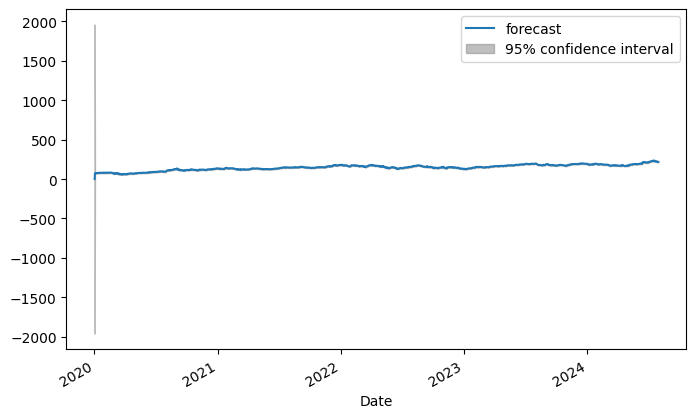

In [76]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(resultado1, dynamic=False)
plt.show()

**7.1 Predicciones en datos que el modelo nunca ha visto separando la base de datos en 70% y 30%**

In [77]:
df = df[df['fecha'].dt.year >= 2020]

In [78]:
df.head()

,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volumen,fecha
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960442,135480400,2020-01-02
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800,2020-01-03
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826843,118387200,2020-01-06
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484337,108872000,2020-01-07
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650360,132079200,2020-01-08


In [79]:
train_data=df.precio_cierre[0:int(len(df.precio_cierre)*0.7)]
test_data=df.precio_cierre[int(len(df.precio_cierre)*0.7):]

In [80]:
historico = train_data.tolist()
predicciones = []
n = len(test_data)
for time_point in range(n):
    model = ARIMA(historico, order=(p,d,q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predicciones.append(yhat)
    true_test_value = test_data[time_point]
    historico.append(true_test_value)

In [81]:
p

0

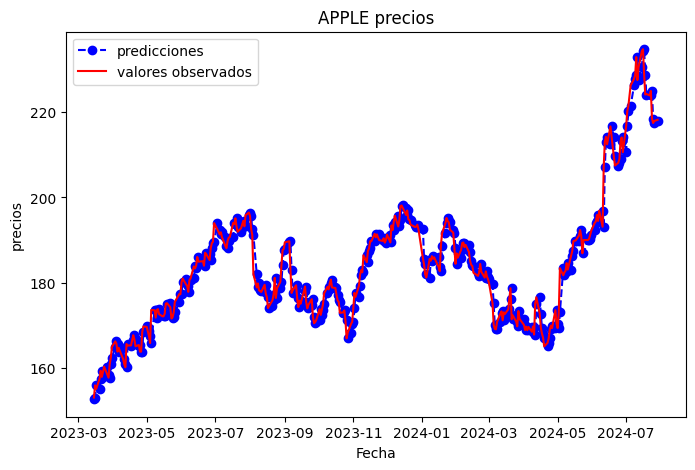

In [82]:
rango = df.precio_cierre[int(len(df.precio_cierre)*0.7):].index
plt.plot(rango, predicciones, color='blue', marker='o', linestyle='dashed', label='predicciones')
plt.plot(rango, test_data, color='red', label='valores observados')
plt.title('APPLE precios')
plt.xlabel('Fecha')
plt.ylabel('precios')

plt.legend()
plt.show()

El modelo sòlo diferenciado, parece predecir decentemente a una frecuencia diaria, ya que los valores reales se encuentran fluctuando alrededor de los valores pronosticados.

Para ajustar más las predicciones podríamos aplicar un modelo SARIMAX, lastimosamente el modelo se escapa a la cobertura de este curso, pero pueden investigarlo online y aplicarlo a nuestra serie.

In [83]:
# prompt: # Predicción de los próximos 5 períodos (días)

# Fit the ARIMA model
model = ARIMA(df.precio_cierre, order=(p, d, q))
model_fit = model.fit()

# Forecast the next 5 periods
forecast = model_fit.forecast(steps=5)

# Print the forecasted values
print(forecast)


1150    218.240005
1151    218.240005
1152    218.240005
1153    218.240005
1154    218.240005
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [84]:
# prompt: Predice los 5 últimos períodos y compare con los valores reales de estas mismas fechas

import pandas as pd
# Ajusta el modelo ARIMA
model = ARIMA(df.precio_cierre, order=(p, d, q))
model_fit = model.fit()

# Pronostica los últimos 5 períodos
forecast = model_fit.predict(start=len(df.precio_cierre)-5, end=len(df.precio_cierre)-1)

# Obtén los valores reales de los últimos 5 períodos
real_values = df.precio_cierre[-5:]

# Imprime los valores pronosticados y reales
print("Valores pronosticados:")
print(forecast)
print("\nValores reales:")
print(real_values)

# Compara los valores pronosticados y reales
comparison = pd.DataFrame({'Pronosticado': forecast, 'Real': real_values})
print("\nComparación:")
print(comparison)


Valores pronosticados:
Date
2024-07-23    223.960007
2024-07-24    225.009995
2024-07-25    218.539993
2024-07-26    217.490005
2024-07-29    217.960007
Name: predicted_mean, dtype: float64

Valores reales:
Date
2024-07-23    225.009995
2024-07-24    218.539993
2024-07-25    217.490005
2024-07-26    217.960007
2024-07-29    218.240005
Name: precio_cierre, dtype: float64

Comparación:
            Pronosticado        Real
Date                                
2024-07-23    223.960007  225.009995
2024-07-24    225.009995  218.539993
2024-07-25    218.539993  217.490005
2024-07-26    217.490005  217.960007
2024-07-29    217.960007  218.240005


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# 8.	ANÁLISIS DE ERRORES

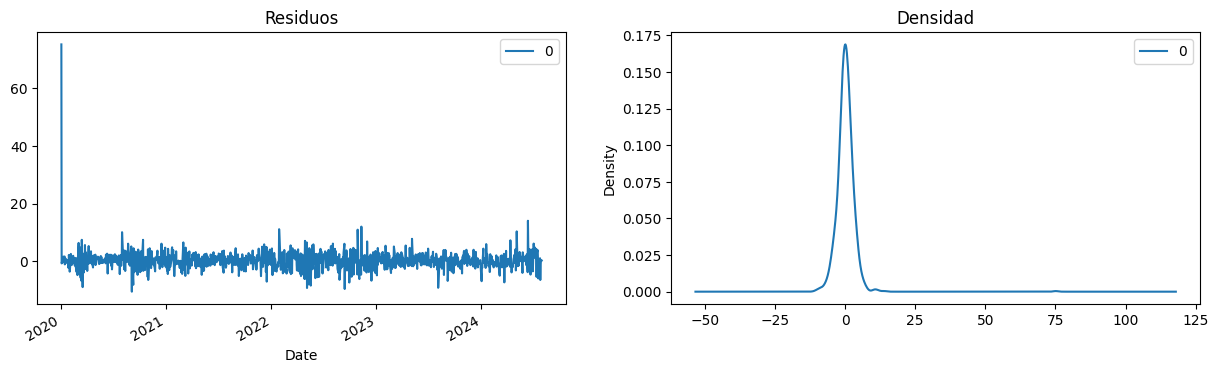

In [85]:
residuos = pd.DataFrame(resultado1.resid)
fig, ax = plt.subplots(1,2, figsize=(15,4))
residuos.plot(title = "Residuos", ax = ax[0])
residuos.plot(kind = 'kde', title = 'Densidad', ax = ax[1])
plt.show()

En el ejemplo anterior, hemos trazado los errores residuales y los gráficos de densidad. Podemos observar que los errores residuales parecen oscilar al alrededor de cero aunque no exctamente y una varianza uniforme en los años posteriores.

In [86]:
# Prueba de Shapiro-Wilk para la normalidad de los residuos
from scipy.stats import shapiro # import the shapiro function from the scipy.stats module
shapiro_test = shapiro(residuos)
print('Prueba de Shapiro-Wilk para la normalidad de los residuos')
print(f'Estadístico: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')

Prueba de Shapiro-Wilk para la normalidad de los residuos
Estadístico: 0.6793239288027398, p-value: 4.5334394395711036e-42
